In [363]:
import sys
sys.path.append("../../")

import numpy as np
import matplotlib.pyplot as plt
import math as m
plt.rcParams.update({
    "text.usetex": False,
    "font.family": "serif",})

# Import pyACC logger
from pyACC.helpers import Logger

# Set the logger
print = Logger("pyACC.CosmologicalDistances")

# Import integration class
from pyACC.cosmology import Dc

# Import pandas
#import pandas as pd

**Compute cosmological distances**

In this exercise you will keep practicing integration in a cosmological context. In particular you will compute cosmological distances.

The basis to compute distances is the Hubble function $H(z)$, which describes the evolution of the backgroud.

For flat $\Lambda$CDM cosmology it reads:

$D_c(z)=\int_{0}^{z}\frac{cdz'}{H(z')}$.

Implement this function, or try your favourite cosmological model!

In [364]:
def hubble_function(z,OmegaM,OmegaR,w,H0):
    return H0*m.sqrt(OmegaM*(1+z)**3+OmegaR*(1+z)**4+(1-OmegaM-OmegaR)*(1+z)**(3*(1+w)))
#H0*m.sqrt(OmegaM*(1+z)**3+1-OmegaM)

In [365]:
# Now use the function you've implemented to compute cosmological distances
# Use the class you've implemented
OmegaM=0.319
OmegaR=0
w_L=-1 #LambdaCDM
w=-1.1 #wCDM
H0=67
get_distances_L = Dc(hubble_function,1,OmegaM,OmegaR,w_L,H0)
get_distances_w = Dc(hubble_function,1,OmegaM,OmegaR,w,H0)

In [366]:
# Comoving distance at z=1
print(get_distances_L, "Mpc")
print(get_distances_w, "Mpc")

2024-03-09 17:41:32.720517 :: pyACC.CosmologicalDistances  :: 3416.054606406177 Mpc
2024-03-09 17:41:32.720684 :: pyACC.CosmologicalDistances  :: 3477.9368750014205 Mpc


In [367]:
# array of redshifts
z_list = np.arange(0,2,0.01)+0.01/2
#np.linspace(0.0001, 2.5, 100)

# Calculate the comoving distance at each redshift in z_list
comoving_distance_L = []
comoving_distance_w = []
for i in range(0,len(z_list)):
    comoving_distance_L.append(Dc(hubble_function,z_list[i],OmegaM,OmegaR,w_L,H0))
    comoving_distance_w.append(Dc(hubble_function,z_list[i],OmegaM,OmegaR,w,H0))
    #print(z_list[i],comoving_distance_L[i],comoving_distance_w[i])

path="comoving_distances.txt"
with open(path,"w") as file:
    for z, d_L, d_w in zip(z_list, comoving_distance_L, comoving_distance_w):
        f_z="{}".format(round(z,5))
        f_d_L="{}".format(d_L)
        f_d_w="{}".format(d_w)
        file.write(f"{f_z:16s}\t{f_d_L:30s}\t{f_d_w:25s}\n")


'''
# Calculate the angular diameter distance at each redshift in z_list
angular_diameter_distance = []
for i in range(0,len(z_list)):
    angular_diameter_distance.append(comoving_distance[i]/(1+z_list[i]))

# Calculate the luminosity distance at each redshift in z_list
luminosity_distance = []
for i in range(0,len(z_list)):
    luminosity_distance.append(comoving_distance[i]*(1+z_list[i]))

# Calculate the distance modulus at each redshift in z_list
distance_modulus = []
for i in range(0,len(z_list)):
    distance_modulus.append(5*m.log10(luminosity_distance[i]*10**5))
'''

'''
for i in range(0,len(z_list)):
    print(z_list[i],comoving_distance[i],angular_diameter_distance[i],luminosity_distance[i],distance_modulus[i])
'''

'\nfor i in range(0,len(z_list)):\n    print(z_list[i],comoving_distance[i],angular_diameter_distance[i],luminosity_distance[i],distance_modulus[i])\n'

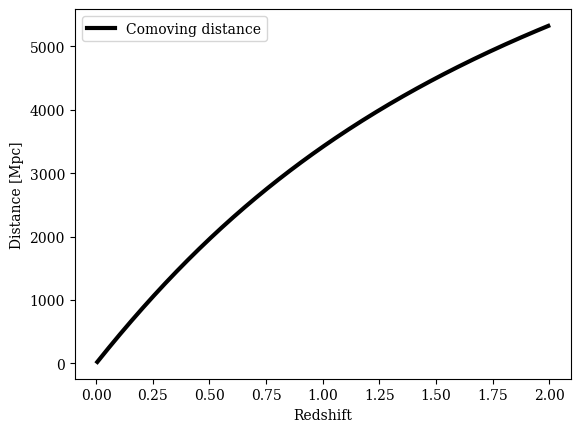

In [368]:
plt.plot(z_list, comoving_distance, lw=3, color="k", label="Comoving distance")

plt.legend()
plt.xlabel("Redshift")
plt.ylabel("Distance [Mpc]");

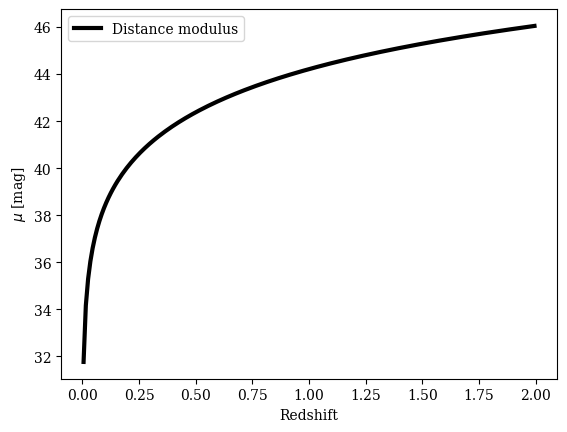

In [369]:
plt.plot(z_list, distance_modulus, lw=3, color="k", label="Distance modulus")
plt.legend()
plt.xlabel("Redshift")
plt.ylabel("$\mu$ [mag]");

**Compare against experimental data**

Let's plot the SNIa distance moduli from Pantheon+ analysis against your favourite cosmological model.

Check out the paper. Data are stored here. Try to understand which table you should use for the plot.

In [370]:
# Read the data from Pantheon+ set. 
# Suggestion #1: pandas
# Suggestion #2: read the documentation to understand which column you should pick

In [371]:
'''
plt.plot(z_list, distance_modulus, lw=2, color="k", label="LCDM - Distance modulus", zorder=1000)
plt.errorbar(.., ..., ..., fmt="o", color="0.5", alpha=0.5, label="Pantheon+")

plt.grid(True, color="0.9", ls="--")
plt.legend(loc="lower right")
plt.xlabel("Redshift")
plt.ylabel("$\mu$ [mag]")
'''

'\nplt.plot(z_list, distance_modulus, lw=2, color="k", label="LCDM - Distance modulus", zorder=1000)\nplt.errorbar(.., ..., ..., fmt="o", color="0.5", alpha=0.5, label="Pantheon+")\n\nplt.grid(True, color="0.9", ls="--")\nplt.legend(loc="lower right")\nplt.xlabel("Redshift")\nplt.ylabel("$\\mu$ [mag]")\n'